---
# <font color="#CA3532">Deep Learning Fundamentals and Basic Tools - Lab Assignment 3</font>
---

Last updated on 2020-10-09

Please report any bugs to luis.lago@uam.es



---

This lab is divided in two sessions:

- *SESSION 1 (Friday, 2020-10-09):* Exercises included in this notebook.

- *SESSION 2 (Friday, 2020-10-16):* Open project.


### <font color="#CA3532">Instructions</font>

- The assignment must be done in pairs.

- All the exercises for the first session are included in this notebook. Complete the sections in the code marked with ``TO-DO`` comments and upload the notebook to the course [Moodle page](https://posgrado.uam.es/course/view.php?id=41889) before the due date. 

- No code should be included out of the ``TO-DO`` blocks.

- Do not forget to include your names and NIAs in the following code block. 

- **Due date (SESSION 1 exercises):** Thursday, 2020-10-22, 23:59.

- Specific instructions for SESSION 2 may be found at the end of this notebook.

In [ ]:
# TO-DO: Include your names and NIAs here:
student_data = [{'name': 'Name of 1st student', 'nia': 'NIA of 1st student'},
                {'name': 'Name of 2nd student', 'nia': 'NIA of 2nd student'}]

### <font color="#CA3532">Work environment</font>

All the code for this lab has been developed with *Google Colab*, a tool by Google, based on the [*Jupyter Notebook*](https://jupyter.org/), that allows to execute Python code in a browser, with almost no configuration required. You can find more information in the following links:

- https://colab.research.google.com/notebooks/welcome.ipynb

- https://www.youtube.com/watch?v=inN8seMm7UI

You will need a Google account. If you have never used *Colab* or *Jupyter* before, read this [Overview guide](https://colab.research.google.com/notebooks/basic_features_overview.ipynb).

If you prefer to work in your local machine you will need to install *Python 3* (we suggest to use the [*Anaconda*](https://www.anaconda.com/) distribution), and [*TensorFlow*](https://www.tensorflow.org/).

As an alternative you may use the lab computers, which have been with installed all the required software. 



### <font color="#CA3532">Clone the lab's github repo</font>

The easiest way of having all the lab material available from *Colab* is to clone our github repository:

In [ ]:
!git clone https://github.com/luisferuam/DLFBT-LAB

fatal: destination path 'DLFBT-LAB' already exists and is not an empty directory.


### <font color="#CA3532">Import the libraries</font>

The following code cells import the required libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pickle

from time import time
import shutil

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [ ]:
import torch

In [ ]:
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

---
# <font color="#CA3532">Lab session 1</font>
---

### <font color="#CA3532">Introduction to PyTorch</font>

[PyTorch](https://pytorch.org/) is an open source machine learning framework that may be a good alternative to [TensorFlow](https://www.tensorflow.org/). It is usually the preferred option amongst the academic comunity because it offers more flexibility and hence it is easier to build custom models. However it lacks a high level layer like [Keras](https://keras.io/), so development could be a bit harder. In the following links you can find comparisons between the two frameworks:

- https://deepsense.ai/keras-or-pytorch/

- https://wrosinski.github.io/deep-learning-frameworks/

In this first part of the lab you will be introduced to the PyTorch framework.

Follow the introductory tutorial in the [PyTorch 60-Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) and then solve the exercises.


### <font color="#CA3532">Automatic differentiation with PyTorch</font>

As you have seen in the tutorial, the flag ``requires_grad=True`` may be used when creating a tensor to indicate that we will compute gradients with respect to it:

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Now, whenever we perform an operation with this tensor, the new tensor that results from this operation includes a function to compute the gradient (``grad_fn``):

In [ ]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


Another example follows:

In [ ]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


To compute the gradients we must run the *backward pass* on the output tensor:

In [ ]:
out.backward()

And then we can access the gradient using the ``grad`` field:

In [ ]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


A simpler example, with scalar variables $x$ and $y$, follows:

$$
z = 2x^{2}y
$$

In [ ]:
x = torch.tensor(2., requires_grad=True)
print(x)
y = torch.tensor(3., requires_grad=True)
print(y)
z = 2*x*x*y
print(z)

tensor(2., requires_grad=True)
tensor(3., requires_grad=True)
tensor(24., grad_fn=<MulBackward0>)


Backward pass:

In [ ]:
z.backward()

Gradients:

$$
\frac{dz}{dx} = 4xy
$$

$$
\frac{dz}{dy} = 2x^{2}
$$


In [ ]:
print(x.grad)
print(y.grad)

tensor(24.)
tensor(8.)


### <font color="#CA3532">Exercise 1</font>

Use PyTorch to find the minimum of the function $y = x^{2}$ starting from and initial guess $x_{0}$ and using gradient descent.



In [ ]:
# Random initial:
x_numpy = np.random.randn()
print("x0 = %.4f" % (x_numpy))

# Number of iterations and learning rate:
niters = 50
lr = 0.1

# Optimization loop:
hh = []
for i in range(niters):
  #-----------------------------------------------------------------------------
  # TO-DO: Define the computational graph using tensors x and y
  #-----------------------------------------------------------------------------
  pass

  #-----------------------------------------------------------------------------
  # TO-DO: Compute the gradient using tensor dx
  #-----------------------------------------------------------------------------
  pass
  
  #-----------------------------------------------------------------------------
  # TO-DO: Update x
  #-----------------------------------------------------------------------------
  pass
  
  # Print values and append to history:
  print(i, x.item(), y.item(), dx.item())
  hh.append(x.item())

x0 = -0.1072
0 -0.10719718784093857 0.011491237208247185 -0.21439437568187714
1 -0.08575774729251862 0.007354391273111105 -0.17151549458503723
2 -0.06860619783401489 0.004706810228526592 -0.13721239566802979
3 -0.054884959012269974 0.0030123586766421795 -0.10976991802453995
4 -0.04390796646475792 0.0019279095577076077 -0.08781593292951584
5 -0.035126373171806335 0.0012338621309027076 -0.07025274634361267
6 -0.028101099655032158 0.0007896717870607972 -0.056202199310064316
7 -0.022480878978967667 0.0005053899367339909 -0.04496175795793533
8 -0.017984703183174133 0.00032344955252483487 -0.03596940636634827
9 -0.014387763105332851 0.0002070077316602692 -0.028775526210665703
10 -0.011510210111737251 0.00013248494360595942 -0.023020420223474503
11 -0.009208167903125286 8.479035750497133e-05 -0.018416335806250572
12 -0.007366534322500229 5.426582720247097e-05 -0.014733068645000458
13 -0.005893227644264698 3.4730132028926164e-05 -0.011786455288529396
14 -0.004714582115411758 2.2227284716791473

The following plot shows the convergence of the algorithm:

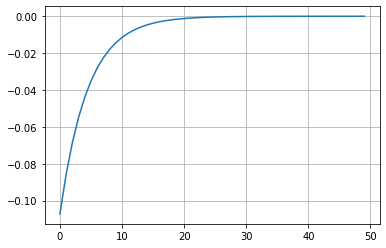

In [ ]:
plt.plot(hh)
plt.grid(True)

### <font color="#CA3532">Exercise 2</font>

Re-implement the ``LinearRegressionModel`` class of lab 1 using PyTorch.

In [ ]:
class LinearRegressionModel_PyTorch(object):

    def __init__(self, d=2):
        # Initialize weights and bias:
        self.w = torch.tensor(np.random.normal((d, 1)), requires_grad=True) 
        self.b = torch.tensor(np.random.normal((1, 1)), requires_grad=True) 
        
    def predict(self, x):
        #-----------------------------------------------------------------------
        # TO-DO block: Compute the model output y
        # Note that:
        # - x is a Nxd tensor, with N the number of patterns and d the dimension
        #   (number of features)
        # - y must be a Nx1 tensor
        #-----------------------------------------------------------------------
        pass
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------

        return y

    def compute_gradients(self, x, t):
        #-----------------------------------------------------------------------
        # TO-DO block: Compute the gradients db and dw of the loss function 
        # with respect to b and w
        # Note that:
        # - x is a Nxd tensor, with N the number of patterns and d the dimension
        #   (number of features)
        # - t is a Nx1 tensor
        # - y is a Nx1 tensor
        # - The gradient db (eq. dw) must have the same shape as b (eq. w) 
        #-----------------------------------------------------------------------
        pass
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------
        
        return db, dw
        
    def gradient_step(self, x, t, eta):
        db, dw = self.compute_gradients(x, t)

        #-----------------------------------------------------------------------
        # TO-DO block: Update the model parameters b and w
        #-----------------------------------------------------------------------
        pass
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------

    def fit(self, x, t, eta, num_iters):
        loss = np.zeros(num_iters)
        for i in range(num_iters):
            self.gradient_step(x, t, eta)
            loss[i] = self.get_loss(x, t).detach().numpy()
        return loss

    def get_loss(self, x, t):
        y = self.predict(x)
        loss = torch.mean(0.5*(y - torch.tensor(t))*(y - torch.tensor(t)))
        return loss

Test the ``predict`` method:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(noise=0.0, n=500)

linrm = LinearRegressionModel_PyTorch()
linrm.w = torch.tensor(dg.a, requires_grad=True)
linrm.b = torch.tensor(dg.b, requires_grad=True)

y = linrm.predict(dg.x)
print(y.shape)                                     # Should be (500, 1)
print(np.abs(y.detach().numpy() - dg.t).max())     # Should be 0 or close to 0 
print(linrm.get_loss(dg.x, dg.t).detach().numpy()) # Should be 0 or close to 0 

torch.Size([500, 1])
1.4210854715202004e-14
5.5226179822259984e-30


Test the ``compute_gradients`` method:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

linrm = LinearRegressionModel_PyTorch()
linrm.w = torch.tensor(dg.a, requires_grad=True)
linrm.b = torch.tensor(dg.b, requires_grad=True)

db, dw = linrm.compute_gradients(dg.x, dg.t)
print(db.shape) # Should be (1, 1)
print(db)       # Should be [[-0.00704326]] approx
print(dw.shape) # Should be (4, 1)
print(dw)       # Should be [[-0.05353578]
                #            [-0.03276935]
                #            [-0.00337341]
                #            [-0.03293776]] approx

(1, 1)
[[-0.00704326]]
(4, 1)
[[-0.05353578]
 [-0.03276935]
 [-0.00337341]
 [-0.03293776]]


Test the ``fit`` method:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=500, seed=17)

linrm = LinearRegressionModel_PyTorch(2)
linrm.w = torch.tensor([[-2.0], [-2.0]], dtype=torch.float64, requires_grad=True)
linrm.b = torch.tensor([[-3.0]], dtype=torch.float64, requires_grad=True)

loss = linrm.fit(dg.x, dg.t, 0.01, 100)
print(loss[-1]) # Should be 2.660068435196912 approx

2.660068435196912


Plot loss vs iteration:

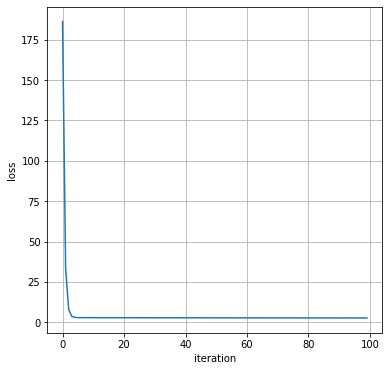

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

### <font color="#CA3532">Neural networks in pytorch</font>


We will build a simple feedforward neural network to classify the digits in the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The next cell loads the data:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Definition of a class that implements the neural network (only the forward pass):

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # Note that we are not explicitly applying a softmax function
        return x

NN instantiation:

In [ ]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


Network parameters:

In [ ]:
params = list(net.parameters())
print(len(params))

for p in params:
  print(p.size())

4
torch.Size([64, 784])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


Let us apply this network to a sample image:

(28, 28)
target = 0


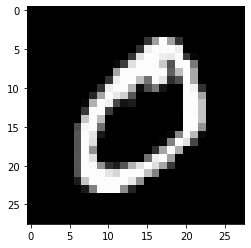

tensor([[-15.8364,  42.3447,  30.1300,  18.1742,   8.2528,  15.0643,  -1.0942,
          47.8920, -13.8266,  40.6218]], grad_fn=<AddmmBackward>)


In [ ]:
print(train_images[1].shape)
print("target =", train_labels[1])
plt.imshow(train_images[1], cmap='gray')
plt.show()

# Image to tensor:
input = torch.tensor(train_images[1], dtype=torch.float) 

# Predict:
out = net(input)
print(out)

Define the optimizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Network training:

In [ ]:
niters = 1000
hh = []
for it in range(niters):  
    # Generate random mini-batch:
    ix = np.random.permutation(60000)[:1000]
    x = torch.tensor(train_images[ix], dtype=torch.float)
    y = torch.tensor(train_labels[ix], dtype=torch.long)

    # Reset gradients:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(x)
    loss = criterion(outputs, y)

    # Backward pass:
    loss.backward()

    # Update:
    optimizer.step()

    # Print stats:
    print('[%d] loss: %.3f' % (it + 1, loss.item()))
    hh.append(loss.item())

[1] loss: 28.105
[2] loss: 19.678
[3] loss: 17.592
[4] loss: 14.034
[5] loss: 5.016
[6] loss: 2.956
[7] loss: 2.094
[8] loss: 1.706
[9] loss: 1.628
[10] loss: 1.580
[11] loss: 1.412
[12] loss: 1.555
[13] loss: 1.579
[14] loss: 1.455
[15] loss: 1.448
[16] loss: 1.485
[17] loss: 1.363
[18] loss: 1.348
[19] loss: 1.245
[20] loss: 1.247
[21] loss: 1.204
[22] loss: 1.167
[23] loss: 1.141
[24] loss: 1.075
[25] loss: 1.111
[26] loss: 1.101
[27] loss: 1.117
[28] loss: 1.043
[29] loss: 1.020
[30] loss: 1.063
[31] loss: 1.037
[32] loss: 0.982
[33] loss: 0.942
[34] loss: 0.933
[35] loss: 0.956
[36] loss: 0.984
[37] loss: 0.941
[38] loss: 0.915
[39] loss: 0.845
[40] loss: 0.901
[41] loss: 0.774
[42] loss: 0.856
[43] loss: 0.866
[44] loss: 0.838
[45] loss: 0.750
[46] loss: 0.787
[47] loss: 0.881
[48] loss: 0.749
[49] loss: 0.781
[50] loss: 0.815
[51] loss: 0.860
[52] loss: 0.727
[53] loss: 0.778
[54] loss: 0.739
[55] loss: 0.773
[56] loss: 0.710
[57] loss: 0.682
[58] loss: 0.662
[59] loss: 0.742
[6

Plot:

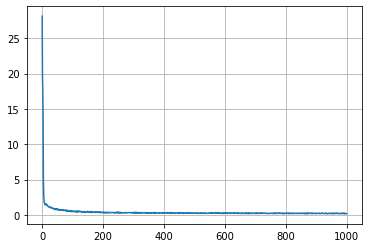

In [ ]:
plt.plot(hh)
plt.grid(True)
plt.show()

Let us classify the same image after training:

(28, 28)
target = 0


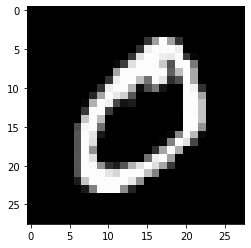

tensor([[ 17.3649, -22.0449,   8.0199,   3.7973,   2.7276,   9.8694,   6.9859,
          10.6175,   4.9958,   7.1057]], grad_fn=<AddmmBackward>)


In [ ]:
print(train_images[1].shape)
print("target =", train_labels[1])
plt.imshow(train_images[1], cmap='gray')
plt.show()

# Image to tensor:
input = torch.tensor(train_images[1], dtype=torch.float) 

# Predict:
out = net(input)
print(out)

Now the highest output is assigned to the correct target.

Accuracy on training data:

In [ ]:
input = torch.tensor(train_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == train_labels).sum() / 60000

0.9403833333333333

Accuracy on test data:

In [ ]:
input = torch.tensor(test_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == test_labels).sum() / 10000

0.937

PyTorch offers some utilities to process batches of data:


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

Let us build ``DataLoader``s for training and test data:

In [ ]:
tensor_x = torch.tensor(train_images, dtype=torch.float)
tensor_y = torch.tensor(train_labels, dtype=torch.long)
train_dataset = TensorDataset(tensor_x, tensor_y) 
train_dataloader = DataLoader(train_dataset, batch_size=1000, shuffle=True) 

tensor_x = torch.tensor(test_images, dtype=torch.float)
tensor_y = torch.tensor(test_labels, dtype=torch.long)
test_dataset = TensorDataset(tensor_x,tensor_y) 
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=True) 

New network:

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Reimplement the training loop using epochs and batches:

In [ ]:
nepochs = 10
hh = []
for it in range(nepochs): 
  rloss = 0.0
  for x, t in train_dataloader:   
    # Reseteo los gradientes a 0:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(x)
    loss = criterion(outputs, t)

    # Backward pass:
    loss.backward()

    # Actualización de los pesos:
    optimizer.step()

    # Acumulo loss:
    rloss += loss.item()

  # Imprimir loss de la época:
  print('[%d] loss: %.3f' % (it + 1, rloss))
  hh.append(rloss)

[1] loss: 122.664
[2] loss: 27.832
[3] loss: 20.689
[4] loss: 17.423
[5] loss: 15.558
[6] loss: 14.343
[7] loss: 13.581
[8] loss: 12.811
[9] loss: 12.272
[10] loss: 11.820


Accuracy on training and test data:

In [ ]:
input = torch.tensor(train_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == train_labels).sum() / 60000

0.9442833333333334

In [ ]:
input = torch.tensor(test_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == test_labels).sum() / 10000

0.9376

### <font color="#CA3532">Exercise 3</font>

Use PyTorch to implement a convolutional neural network and apply it to classify the images of the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. The network should have at least the following characteristics:

- Convolutional layers.
- Pooling layers.
- Some regularization mechanism, such as dropout or L2 regularization.
- Batch normalization layers.

The network should obtain at least **75%** accuracy on the test set.

The example in the [Training a classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) tutorial may be a good starting point.

You can also check the available PyTorch layers in the [torch.nn](https://pytorch.org/docs/stable/nn.html) module documentation.


In [ ]:
#-------------------------------------------------------------------------------
# TO-DO: Implement a CNN for the CIFAR-10 dataset. Use this cell and the
# followings to include your code.
#-------------------------------------------------------------------------------

---
# <font color="#CA3532">Lab session 2</font>
---

Develop a cool project using some of the techniques and tools that you have learnt in this course. 

More details soon.

Need inspiration? See the kind of things other students like you are doing [out there](http://cs231n.stanford.edu/2017/reports.html).